Hcokey Rink for Shot Tracking

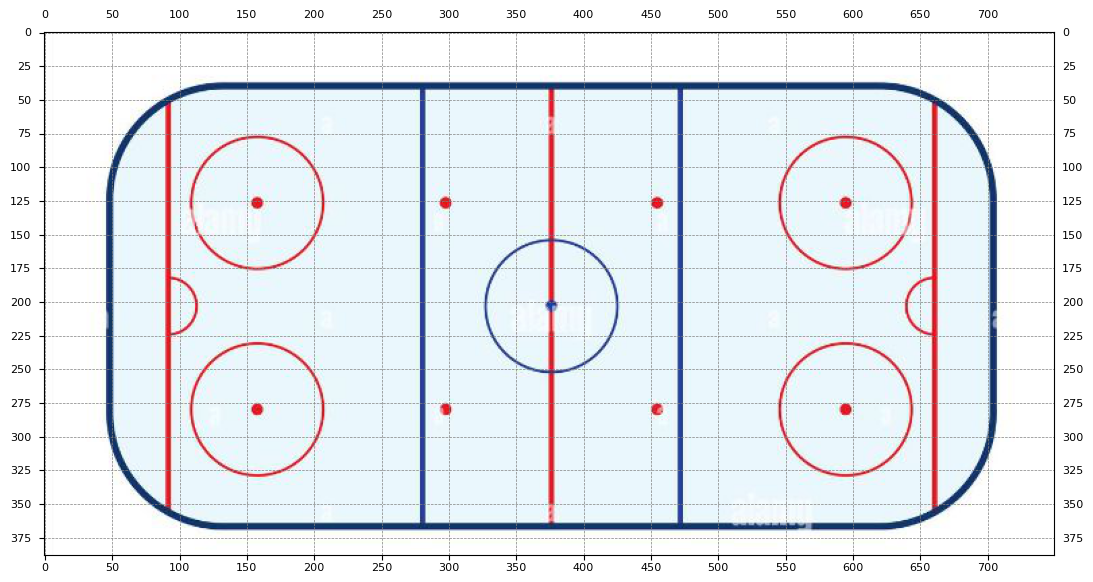

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image
img = mpimg.imread('C:/Users/loutz/Flyers_Youth/Flyers_Youth/resources/rink_image.jpg') 

# Create a figure with the size of a landscape letter page (11 inches x 8.5 inches)
fig, ax = plt.subplots(figsize=(11, 8.5))  # Letter size in landscape mode

# Display the image
ax.imshow(img)

# Get the dimensions of the image
height, width, _ = img.shape

# Set gridline spacing (e.g., every 100 pixels for X and every 50 pixels for Y)
grid_spacing_x = 50
grid_spacing_y = 25

# Draw vertical and horizontal gridlines
ax.set_xticks(np.arange(0, width, grid_spacing_x))
ax.set_yticks(np.arange(0, height, grid_spacing_y))
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Add X coordinates on the top and bottom of the image
for x in np.arange(0, width, grid_spacing_x):
    ax.text(x, -10, f'{x}', color='black', fontsize=8, ha='center', va='bottom')  # Top coordinates
    ax.text(x, height + 5, f'{x}', color='black', fontsize=8, ha='center', va='top')  # Bottom coordinates

# Add Y coordinates on the left and right of the image
for y in np.arange(0, height, grid_spacing_y):
    ax.text(-10, y, f'{y}', color='black', fontsize=8, ha='right', va='center')  # Left coordinates
    ax.text(width + 5, y, f'{y}', color='black', fontsize=8, ha='left', va='center')  # Right coordinates

# Remove axis labels and ticks
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adjust layout to fit the resized image
plt.tight_layout()

# Save the modified image
plt.savefig('hockey_rink_with_gridlines_and_coordinates.jpg', dpi=300)

# Show the final image with gridlines and coordinates on the outside
plt.show()